In [1]:
import pandas as pd

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation
from sklearn.model_selection import train_test_split # simple TT split cv
from functions import cleanDF
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
subscriberDF = pd.read_csv('../data/subscriberClean.csv')
from functions import cleanDF
subscriberDF = cleanDF(subscriberDF)
subscriberDF = subscriberDF.drop('Free Trial Start Date', axis = 1)
subscriberDF = subscriberDF.drop('Free Trial Expiration', axis = 1)
subscriberDF.dropna()
print(subscriberDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40102 entries, 0 to 40101
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       40102 non-null  int64         
 1   Language                 40102 non-null  category      
 2   Subscription Type        40102 non-null  category      
 3   Subscription Event Type  40102 non-null  category      
 4   Purchase Store           40102 non-null  category      
 5   Purchase Amount          26923 non-null  float64       
 6   Currency                 26924 non-null  category      
 7   Subscription Start Date  40102 non-null  datetime64[ns]
 8   Subscription Expiration  40102 non-null  datetime64[ns]
 9   Demo User                40102 non-null  bool          
 10  Free Trial User          40102 non-null  bool          
 11  Auto Renew               40102 non-null  bool          
 12  Country                  26924 n

In [3]:
subscriberDF.dropna(subset=['Purchase Amount'], inplace=True)

#feature engineering - subscription length in days column
subscriberDF['Subscription Length'] = (subscriberDF['Subscription Start Date'] - subscriberDF['Subscription Expiration'].min()).dt.days

#dropping - no longer needed, replaced with expiration column
subscriberDF = subscriberDF.drop('Subscription Start Date', axis = 1)
subscriberDF = subscriberDF.drop('Subscription Expiration', axis = 1)

#features
features = ['Language', 'Subscription Type', 'Subscription Event Type',
       'Purchase Store', 'Purchase Amount', 'Currency', 'Demo User',
       'Free Trial User', 'Auto Renew', 'Country', 'User Type', 'Lead Platform',
       'Email Subscriber', 'Push Notifications', 'Send Count', 'Open Count',
       'Click Count', 'Unique Open Count', 'Unique Click Count', 'Subscription Length']

#dummying
categorical = ['Language', 'Subscription Type', 'Subscription Event Type', 'Purchase Store',
                'Currency', 'Country', 'User Type', 'Lead Platform']
subscriberDF[categorical] = subscriberDF[categorical].astype(object)
subscriberDF_dummies = pd.get_dummies(subscriberDF[categorical])
col_names = [str(col) for col in subscriberDF_dummies.columns]
features.append(col_names)

#concat, print head and verify changes
subscriberDF = pd.concat([subscriberDF, subscriberDF_dummies], axis = 1)
subscriberDF.head()


,ID,Language,Subscription Type,Subscription Event Type,Purchase Store,Purchase Amount,Currency,Demo User,Free Trial User,Auto Renew,Country,User Type,Lead Platform,Email Subscriber,Push Notifications,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count,Subscription Length,Language_ALL,Language_ARA,Language_CHI,Language_DAR,Language_DEU,Language_EBR,Language_ENG,Language_ESC,Language_ESP,Language_FAR,Language_FRA,Language_GLE,Language_GRK,Language_HEB,Language_HIN,Language_IND,Language_ITA,Language_JPN,Language_KIS,Language_KOR,Language_LAT,Language_NED,Language_PAS,Language_POL,Language_POR,Language_RUS,Language_SVE,Language_TGL,Language_TUR,Language_URD,Language_VIE,Subscription Type_Lifetime,Subscription Type_Limited,Subscription Event Type_INITIAL_PURCHASE,Subscription Event Type_RENEWAL,Purchase Store_App,Purchase Store_Web,Currency_AED,Currency_AUD,Currency_BGN,Currency_BRL,Currency_CAD,Currency_CHF,Currency_CLP,Currency_COP,Currency_CRC,Currency_CZK,Currency_DKK,Currency_EGP,Currency_EUR,Currency_GBP,Currency_GHS,Currency_HKD,Currency_HUF,Currency_IDR,Currency_ILS,Currency_INR,Currency_JPY,Currency_KRW,Currency_KZT,Currency_LBP,Currency_MXN,Currency_MYR,Currency_NOK,Currency_NZD,Currency_PEN,Currency_PHP,Currency_PLN,Currency_QAR,Currency_RON,Currency_RSD,Currency_RUB,Currency_SAR,Currency_SEK,Currency_SGD,Currency_THB,Currency_TRY,Currency_UAH,Currency_USD,Currency_VND,Currency_ZAR,Country_Australia,Country_Brazil,Country_Bulgaria,Country_Canada,Country_Chile,Country_Colombia,Country_Costa Rica,Country_Czech Republic,Country_Denmark,Country_Egypt,Country_European Union,Country_Ghana,Country_Hong Kong,Country_Hungary,Country_India,Country_Indonesia,Country_Israel,Country_Japan,Country_Kazakhstan,Country_Lebanon,Country_Malaysia,Country_Mexico,Country_New Zealand,Country_Norway,Country_Peru,Country_Philippines,Country_Poland,Country_Qatar,Country_Romania,Country_Russia,Country_Saudi Arabia,Country_Serbia,Country_Singapore,Country_South Africa,Country_South Korea,Country_Sweden,Country_Switzerland,Country_Thailand,Country_Turkey,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,User Type_Consumer,User Type_Other,Lead Platform_App,Lead Platform_Unknown,Lead Platform_Web
1,2,EBR,Limited,INITIAL_PURCHASE,Web,39.00,USD,True,True,False,United States,Consumer,Web,True,True,4,3,0,1,0,391,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True
2,3,ESP,Limited,INITIAL_PURCHASE,Web,0.00,USD,True,True,False,United States,Consumer,Web,True,True,1,0,0,0,0,59,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [16]:
# full feature list
# features = ['Purchase Amount','Demo User','Free Trial User','Auto Renew','Email Subscriber','Push Notifications',
# 'Send Count','Open Count','Click Count','Unique Open Count','Unique Click Count',
# 'Subscription Length', 'Language_ALL', 'Language_ARA',
# 'Language_CHI','Language_DAR','Language_DEU','Language_EBR','Language_ENG','Language_ESC','Language_ESP',
# 'Language_FAR','Language_FRA','Language_GLE','Language_GRK','Language_HEB','Language_HIN','Language_IND',
# 'Language_ITA','Language_JPN','Language_KIS','Language_KOR','Language_LAT','Language_NED','Language_PAS',
# 'Language_POL','Language_POR','Language_RUS','Language_SVE','Language_TGL','Language_TUR','Language_URD',
# 'Language_VIE','Subscription Type_Lifetime', 'Subscription Event Type_INITIAL_PURCHASE','Subscription Type_Limited',
# 'Subscription Event Type_RENEWAL','Purchase Store_App','Purchase Store_Web',
# 'Country_Australia','Country_Brazil','Country_Bulgaria','Country_Canada','Country_Chile','Country_Colombia',
# 'Country_Costa Rica','Country_Czech Republic','Country_Denmark','Country_Egypt','Country_European Union',
# 'Country_Ghana','Country_Hong Kong','Country_Hungary','Country_India','Country_Indonesia','Country_Israel',
# 'Country_Japan','Country_Kazakhstan','Country_Lebanon','Country_Malaysia','Country_Mexico','Country_New Zealand',
# 'Country_Norway','Country_Peru','Country_Philippines','Country_Poland','Country_Qatar','Country_Romania',
# 'Country_Russia','Country_Saudi Arabia','Country_Serbia','Country_Singapore','Country_South Africa',
# 'Country_South Korea','Country_Sweden','Country_Switzerland','Country_Thailand','Country_Turkey','Country_Ukraine',
# 'Country_United Arab Emirates','Country_United Kingdom','Country_United States','Country_Vietnam',
# 'User Type_Consumer','Lead Platform_App','Lead Platform_Web','User Type_Other','Lead Platform_Unknown']

features = [
'Purchase Amount',
'Demo User','Free Trial User','Auto Renew','Email Subscriber','Push Notifications',
'Send Count','Open Count','Click Count','Unique Open Count','Unique Click Count',
# 'Subscription Length',
# 'Language_ALL',
'Language_ARA',
'Language_CHI','Language_DAR','Language_DEU','Language_EBR','Language_ENG','Language_ESC','Language_ESP',
'Language_FAR','Language_FRA','Language_GLE','Language_GRK','Language_HEB','Language_HIN','Language_IND',
'Language_ITA','Language_JPN','Language_KIS','Language_KOR','Language_LAT','Language_NED','Language_PAS',
'Language_POL','Language_POR','Language_RUS','Language_SVE','Language_TGL','Language_TUR','Language_URD',
'Language_VIE','Subscription Type_Lifetime',
#'Subscription Event Type_INITIAL_PURCHASE',
#'Subscription Type_Limited','
# 'Subscription Event Type_RENEWAL',
'Purchase Store_App','Purchase Store_Web',
# 'Country_Australia','Country_Brazil','Country_Bulgaria','Country_Canada','Country_Chile','Country_Colombia',
# 'Country_Costa Rica','Country_Czech Republic','Country_Denmark','Country_Egypt','Country_European Union',
# 'Country_Ghana','Country_Hong Kong','Country_Hungary','Country_India','Country_Indonesia','Country_Israel',
# 'Country_Japan','Country_Kazakhstan','Country_Lebanon','Country_Malaysia','Country_Mexico','Country_New Zealand',
# 'Country_Norway','Country_Peru','Country_Philippines','Country_Poland','Country_Qatar','Country_Romania',
# 'Country_Russia','Country_Saudi Arabia','Country_Serbia','Country_Singapore','Country_South Africa',
# 'Country_South Korea','Country_Sweden','Country_Switzerland','Country_Thailand','Country_Turkey','Country_Ukraine',
# 'Country_United Arab Emirates','Country_United Kingdom','Country_United States','Country_Vietnam',
'User Type_Consumer','Lead Platform_App','Lead Platform_Web']
# 'User Type_Other',
# 'Lead Platform_Unknown']

In [17]:
# PCA

from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

pca = PCA()

pca.fit(subscriberDF[features])

print(len(pca.explained_variance_ratio_))
print(len(pca.explained_variance_ratio_.cumsum()))

pcaDF = pd.DataFrame({"Column": features,
                      "expl_var":
                      pca.explained_variance_ratio_,
                      "pc": range(0, len(pca.explained_variance_ratio_)),
                      "cum_var":
                      pca.explained_variance_ratio_.cumsum()})

print(pcaDF)

47
47
                        Column      expl_var  pc   cum_var
0              Purchase Amount  5.214628e-01   0  0.521463
1                    Demo User  3.910512e-01   1  0.912514
2              Free Trial User  6.723180e-02   2  0.979746
3                   Auto Renew  1.888517e-02   3  0.998631
4             Email Subscriber  1.143006e-03   4  0.999774
5           Push Notifications  8.135022e-05   5  0.999855
6                   Send Count  3.113223e-05   6  0.999886
7                   Open Count  2.506040e-05   7  0.999911
8                  Click Count  1.692059e-05   8  0.999928
9            Unique Open Count  1.516218e-05   9  0.999944
10          Unique Click Count  8.145047e-06  10  0.999952
11                Language_ARA  6.102013e-06  11  0.999958
12                Language_CHI  5.420510e-06  12  0.999963
13                Language_DAR  4.591651e-06  13  0.999968
14                Language_DEU  4.339817e-06  14  0.999972
15                Language_EBR  4.038973e-06  15  

In [19]:
#PCA Plots
# (ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())
# (ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
#  geom_point(color = "pink") + geom_hline(yintercept = 0.95))

In [20]:
loadings = pd.DataFrame({"loading": pca.components_.flatten(),
            "comp": np.repeat(range(0,len(pca.explained_variance_ratio_)),  len(pca.explained_variance_ratio_),
        axis=0), "variable":np.tile(features,len(pca.explained_variance_ratio_)) })

loadings.head(len(pca.explained_variance_ratio_)).sort_values(by = 'loading')

,loading,comp,variable
3,-1.251157e-03,0,Auto Renew
18,-1.092415e-03,0,Language_ESP
20,-5.442255e-04,0,Language_FRA
16,-4.225755e-04,0,Language_ENG
26,-3.031815e-04,0,Language_ITA
14,-2.469357e-04,0,Language_DEU
17,-2.451237e-04,0,Language_ESC
42,-2.192644e-04,0,Purchase Store_App
15,-1.887111e-04,0,Language_EBR
27,-1.614705e-04,0,Language_JPN


In [21]:
features = ['Auto Renew', 'Subscription Event Type_RENEWAL', 'Language_ESP', 'Purchase Store_App',
            'Open Count', 'Send Count', 'Click Count', 'Unique Open Count', 'Unique Click Count', 'Free Trial User',
             'Email Subscriber', 'Push Notifications']

In [22]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Decision Tree
from sklearn.model_selection import train_test_split, KFold

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score, recall_score, precision_score

#decision tree classifier
features = ['Language_ESP', 'Purchase Store_App', 
            'Open Count', 'Send Count', 'Click Count', 'Unique Open Count', 'Unique Click Count']
X = subscriberDF[features]

y = subscriberDF['Auto Renew']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()
continuous = ['Send Count', 'Open Count',
       'Click Count', 'Unique Open Count', 'Unique Click Count']
z.fit(X_train[continuous])

X_train[continuous] = z.transform(X_train[continuous])
X_test[continuous] = z.transform(X_test[continuous])


tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

#metrics
print("Train Acc: ", accuracy_score(y_train, tree.predict(X_train)))
print("Test Acc: ", accuracy_score(y_test, tree.predict(X_test)))

print("TEST Precision : ", precision_score(y_test, tree.predict(X_test)))
print("TRAIN Precision: ", precision_score(y_train, tree.predict(X_train)))

print("TEST Recall : ", recall_score(y_test, tree.predict(X_test)))
print("TRAIN Recall: ", recall_score(y_train, tree.predict(X_train)))

print("TEST ROC/AUC : ", roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))
print("TRAIN ROC/AUC: ", roc_auc_score(y_train, tree.predict_proba(X_train)[:,1]))

Train Acc:  0.7866561426316279
Test Acc:  0.7060352831940576
TEST Precision :  0.6355555555555555
TRAIN Precision:  0.8446346280447663
TEST Recall :  0.3787076271186441
TRAIN Recall:  0.49754395036194415
TEST ROC/AUC :  0.682687006538292
TRAIN ROC/AUC:  0.8502550783971329


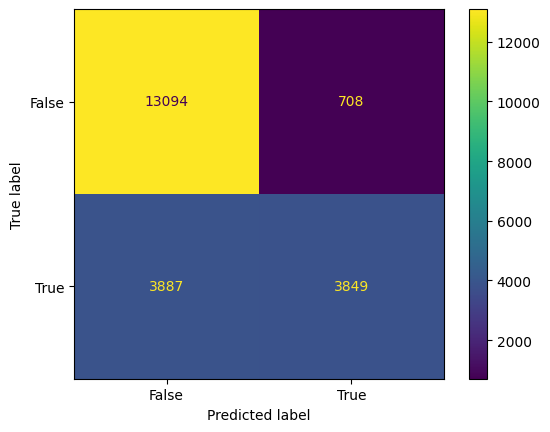

In [25]:
#Decision Tree Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, tree.predict(X_train))

In [24]:
tree.get_depth()
tree.get_n_leaves()
tree.feature_importances_

array([0.03943624, 0.27755554, 0.15734147, 0.30073319, 0.07473525,
       0.11806505, 0.03213327])